# Análisis exploratorio y preprocesamiento - MELI Challenge
## Nombre: Ramón Llorente

## En el presente notebook bucearemos los datos, en busca de patrones, y analizaremos caracteristimas que encontremos interesantes.
## Luego procederemos a crear variables y trasformarlas para que quede listo el conjunto de datos para los modelos a entrenar.

In [3]:

%matplotlib inline
# standard
from collections import Counter
import os
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)

# datos y numericas
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# visualización
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

# mapas
import folium


### Comenzemos levantando el conjunto de datos serializado, y dando u primer vistazo

In [89]:
df = pd.read_pickle('master_1_0.df')
df.shape

(28059, 43)

In [4]:
df.head()

,pub_title,seller_registration_date,seller_reputation_level,power_seller_status,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,...,shipping_free_shipping,shipping_mode,seller_address_state_name,seller_contact_webpage,n_attributes,item_visits,user_visits,sold_quantity,available_quantity,item_id
0,Smart Tv Rca X55andtv Led 4k 55 100v/240v,2016-10-04 15:46:28-04:00,5,platinum,0.0,0.0,0.0,12283.0,1965.0,37.0,...,False,not_specified,Buenos Aires,NaN,30,34,438015,5,1,MLA871657598
1,Smart Tv Philips 6600 Series 50pud6654/77 Led ...,2016-10-04 15:46:28-04:00,5,platinum,0.0,0.0,0.0,12283.0,1965.0,37.0,...,True,me2,Buenos Aires,NaN,33,352,438015,5,1,MLA885144534
2,Smart Tv Samsung Series 7 Un43tu7000gczb Led 4...,2013-07-31 08:14:50-04:00,3,NaN,0.0,0.0,0.0,86020.0,12295.0,261.0,...,False,custom,Capital Federal,NaN,36,1071,1369576,5,1,MLA910600162
3,Tv Box Noga Pc Ultra Estándar 4k 8gb Negro C...,2002-04-13 02:00:00-04:00,5,platinum,0.0,0.0,0.0,19134.0,2956.0,22.0,...,True,me2,Buenos Aires,NaN,29,1528,116539,200,1,MLA895877679
4,Smart Tv Tedge Ntv504k Led 4k 50 220v,2019-03-19 08:41:57-04:00,5,platinum,0.0,0.0,0.0,367677.0,60652.0,422.0,...,True,me2,Buenos Aires,NaN,58,44250,3444269,500,500,MLA877436109


### 1. EDA - Introducción al conjunto de datos

#### Podemos ver que se trata de una matriz de 28059 filas y 43 columnas. 
#### A simple vista se ven varias variables a limpiar, analizar correlaciones y/o transformar.
#### Empezemos mirando los tipos de datos en las columnas, que tengan su tipo de dato correcto.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28059 entries, 0 to 28058
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype                                 
---  ------                         --------------  -----                                 
 0   pub_title                      28059 non-null  object                                
 1   seller_registration_date       27924 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 2   seller_reputation_level        25003 non-null  object                                
 3   power_seller_status            21615 non-null  object                                
 4   seller_ratings_negative        27924 non-null  float64                               
 5   seller_ratings_neutral         27924 non-null  float64                               
 6   seller_ratings_positive        27924 non-null  float64                               
 7   seller_transactions_total      27924 non-null  float64             

#### Miremos un poco de las variables numéricas, los indicadores principales, de centralidad y dispersión
#### A simple vista se puede ver que hay magnitudes muy diferentes, y es algo a tener en cuenta para el caso de algoritmos sensibles.

In [116]:
df.describe()

,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,seller_claims_rate,seller_cancellations_rate,seller_cancellations_value,seller_delayed_handling_value,...,health,price,original_price,n_attributes,item_visits,user_visits,sold_quantity,available_quantity,domain_encoded,domain_cluster
count,27924.000000,27924.000000,27924.000000,27924.000000,27923.000000,27922.000000,27923.000000,27922.000000,27922.000000,27922.000000,...,26743.000000,2.805900e+04,28059.000000,28059.000000,28059.000000,2.805900e+04,28059.000000,28059.000000,28059.000000,28059.000000
mean,0.000680,0.022669,0.130784,32696.628384,5079.386133,59.852804,0.009071,0.004441,27.035993,65.850082,...,0.816987,1.375488e+05,3399.615962,23.789622,328.402509,3.566324e+05,39.313518,299.062974,56.844970,0.724972
std,0.026076,0.148848,0.337170,69152.530189,12070.311034,136.104633,0.020125,0.025054,75.786377,265.123849,...,0.125168,1.093432e+06,19644.730295,25.316738,3084.779232,7.941920e+05,190.831605,3104.685402,36.741851,0.921090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.280000,3.300000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,866.000000,178.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,5.499500e+03,0.000000,11.000000,0.000000,5.314000e+03,0.000000,1.000000,25.000000,0.000000
50%,0.000000,0.000000,0.000000,7769.000000,1100.000000,9.000000,0.007900,0.000000,2.000000,3.000000,...,0.830000,1.999000e+04,0.000000,18.000000,0.000000,9.648400e+04,4.000000,1.000000,51.000000,0.000000
75%,0.000000,0.000000,0.000000,28413.000000,3960.000000,50.000000,0.013200,0.005500,15.000000,26.000000,...,0.900000,5.249425e+04,0.000000,28.000000,0.000000,3.105100e+05,15.000000,1.000000,92.000000,2.000000
max,1.000000,1.000000,1.000000,455592.000000,90772.000000,942.000000,1.000000,1.000000,642.000000,3678.000000,...,1.000000,1.111111e+08,606149.000000,224.000000,226965.000000,7.880053e+06,5000.000000,50000.000000,152.000000,2.000000


### 2. EDA - Valores Faltantes

#### Sigamos mirando la cantidad de valores faltantes NaNs por variable, en terminos absolutos y relativos

In [7]:
col_nan = {c:{'abs':None, 'relative':None} for c in df.columns}
for c in df.columns:
    col_nan[c]['abs'] = df[df[c].isna()].shape[0]
    col_nan[c]['relative'] = round(df[df[c].isna()].shape[0] / df.shape[0], 4)
print(col_nan)

{'pub_title': {'abs': 0, 'relative': 0.0}, 'seller_registration_date': {'abs': 135, 'relative': 0.0048}, 'seller_reputation_level': {'abs': 3056, 'relative': 0.1089}, 'power_seller_status': {'abs': 6444, 'relative': 0.2297}, 'seller_ratings_negative': {'abs': 135, 'relative': 0.0048}, 'seller_ratings_neutral': {'abs': 135, 'relative': 0.0048}, 'seller_ratings_positive': {'abs': 135, 'relative': 0.0048}, 'seller_transactions_total': {'abs': 135, 'relative': 0.0048}, 'seller_sales_completed': {'abs': 136, 'relative': 0.0048}, 'seller_claims_value': {'abs': 137, 'relative': 0.0049}, 'seller_claims_rate': {'abs': 136, 'relative': 0.0048}, 'seller_cancellations_rate': {'abs': 137, 'relative': 0.0049}, 'seller_cancellations_value': {'abs': 137, 'relative': 0.0049}, 'seller_delayed_handling_value': {'abs': 137, 'relative': 0.0049}, 'seller_delayed_handling_rate': {'abs': 136, 'relative': 0.0048}, 'sale_price': {'abs': 28059, 'relative': 1.0}, 'buying_mode': {'abs': 0, 'relative': 0.0}, 'listi

#### Visualicémoslo para darnos una intuicion de como estamos

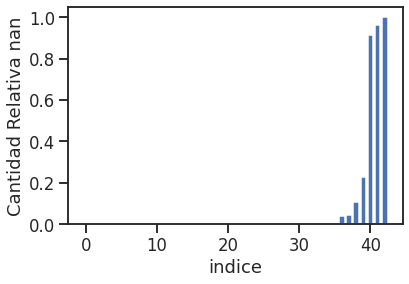

In [8]:
col_nan_rel_sort = np.sort([col_nan[k]['relative'] for k in col_nan])

plt.bar(x=list(range(len(col_nan_rel_sort))), height=col_nan_rel_sort)
plt.xlabel('indice')
plt.ylabel('Cantidad Relativa nan')
plt.show()

#### Vemos que, independientemente de los valores índice del eje X, hay tres variables con 
#### gran proporcion de valores faltantes. Las deberemos podar del conjunto de datos ya que 
#### es demasiado elevado para realizar una imputacion, dado que por lo meos aun, no queremos hacer 
#### un resampleo de aumentacion de los datos. Y estas variables son:


In [9]:
for k, v in col_nan.items():
    if v['relative'] > .6:
        print(f"{k} tiene {v['relative']} faltantes")

sale_price tiene 1.0 faltantes
original_price tiene 0.9157 faltantes
seller_contact_webpage tiene 0.9626 faltantes


#### Como bien sabemos de la documentacion del presente desafío, el campo _"original_price"_ esta null cuando no tiene precio con descuento. Por lo que hay hay solo un %8.5 de observaciones con descuento: la dejaremos como variable indicadora del mismo. Luego _"seller_contact_webpage"_ y _"sale_price"_ tienen una proporcion muy alta de faltantes, por lo tanto las quitaremos.

In [90]:
df = df.drop(['sale_price', 'seller_contact_webpage'], axis=1)


### 3. EDA - Correlaciones

#### Sigamos con una visualización tipo _heatmap_ del coeficiente de correlacion entre las variables numéricas:

<AxesSubplot:>

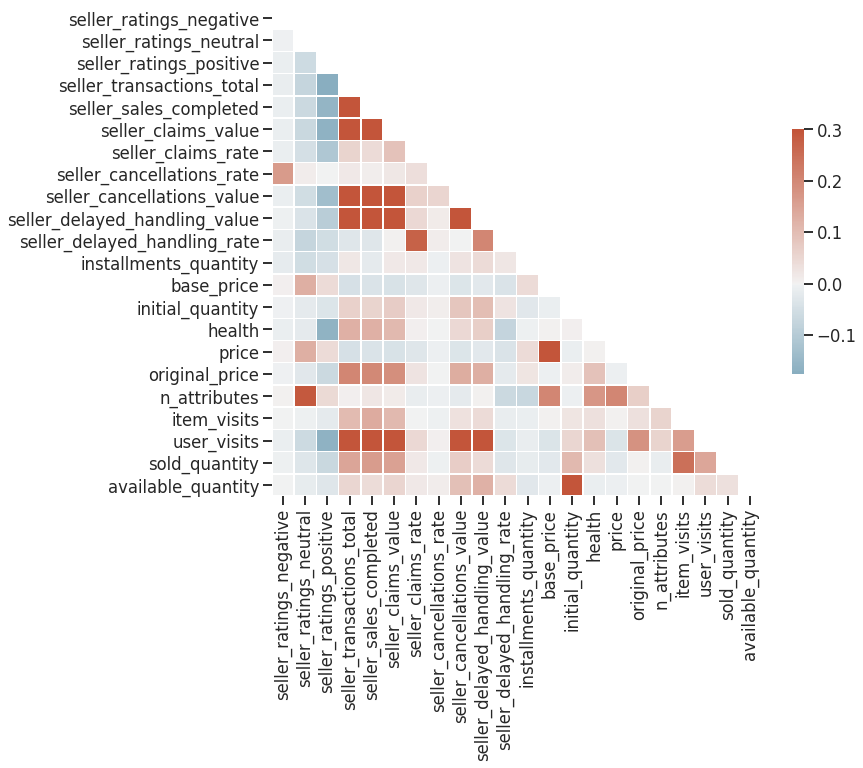

In [11]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Vemos en muchos casos lo esperable en cuanto a variables que hablan de cosas parecidas: 
* price <-> base_price: tienen alta correlacion positiva
* initial_quantity <-> available_quantity: tienen correlacion positiva
* seller_sales_completed <-> seller_transactions_total
#### Luego vemos otras mas interesantes, que podrian ser esperables, pero nada es obvio:
* seller_delayed_handling_rate <-> seller_claims_rate: Es decir, la tasa de retraso en la entrega esta positivamente relacionada con la tasa de reclamos al vendedor. Es esperable, pero aqui la evidencia lo apoya.
* seller_ratings_negative <-> seller_cancellations_rate: la correlacion en este caso no es tan potente, tambien esperable.
#### Llama la atencion una banda de correlaciones negativas a lo largo de la variable _"seller_ratings_positive"_ . Pareciera que la evidencia de estos datos apoyan la idea de que a medida de que las ventas completadas y/o transacciones efectuadas crecen, decrece el rating positivo. Podria pensarse que los vendedores, a medida que realizan mas operaciones, mas se exponen a malas evaluaciones de parte de los compradores. 
#### Habría que resaltar la cantidad de variables correlacionadas positivamente con _"user_visits"_ . Esta relacionado positivamente con cancelaciones, demoras y variables que expresan operaciones concretadas. ¿Podria ser una variable que resume información de otras? Habra que tener esto en cuenta para los modelos a entrenar, especialmente en los se ven afectados por la colinearidad como la regresión múltiple.
#### Por último, sobre la variable objetivo de este trabajo, _"sold_quantity"_ tiene algunas correlaciones parecidas a la mencionada _"user_visits"_ , pero no tan potentes. La variable que mas se correlaciona positivamente es _"item_visits"_ . Esto indica que podría ser una importante variable para la su predicción y explicación. Veremos mas adelante. 

### 4. EDA - Variable objetivo

#### Sigamos explorando un poco los datos

#### Miremos primero un poco la variable objetivo del trabajo _sold_quantity_
#### Su distribución como se puede ver, esta muy sesgada hacia la izquierda, con una mediana mucho menor que la media (una diferencia de 35). Un desvío estándar alto, pero una distancia entre el primer y tercer cuartil muy chica. Mas abajo en la celda de código se puede ver que la moda es 0. Es decir, las tres medidas de centralidad mas conocidas, estan bien separadas. 
#### Probablemente un gráfico de caja permita ver muchos valores atípicos hacia la derecha.

In [117]:
df.sold_quantity.describe()

count    28059.000000
mean        39.313518
std        190.831605
min          0.000000
25%          0.000000
50%          4.000000
75%         15.000000
max       5000.000000
Name: sold_quantity, dtype: float64

In [131]:
df.sold_quantity.mode()

0    0
dtype: int64

#### Bien, veamos el gráfico de su distribución sin hacerle nada mas. Vemos que los valores atípicos altos no dejan visualizar bien donde se concentran mas los valores, entre 0 y 10.

<AxesSubplot:xlabel='sold_quantity', ylabel='Density'>

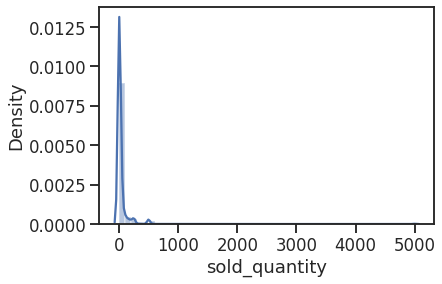

In [122]:
sns.distplot(df.sold_quantity)

#### Podemos ahora los valores en el 10%

<AxesSubplot:ylabel='Density'>

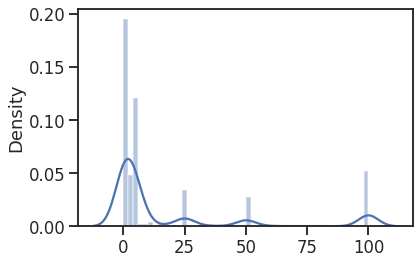

In [120]:
vals = winsorize(df.sold_quantity, limits=[0.1, 0.1])

sns.distplot(vals)

#### Ahora sí se puede visualizar mejor la distribucion multimodal, que podría decirse que por su naturaleza de ser números enteros mayores a 0, correspondería a la distribución de Poisson...agregaria que con valores atípicos que la hacen ver multimodal. 

<AxesSubplot:ylabel='Density'>

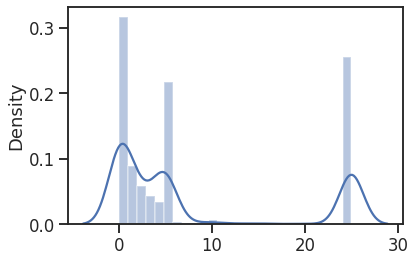

In [134]:
vals = winsorize(df.sold_quantity, limits=[0, 0.20])

sns.distplot(vals)

In [148]:
counted = Counter(df.sold_quantity)
inverse_c = {v:k for k, v in counted.items() 
             if v > np.mean(df.sold_quantity)}
count_list = np.sort(list(inverse_c))[::-1]
print("Ordenado en forma descendiente, para los valores por encimade la media: \n\n")
for count in count_list:
    print(f"Cantidad: {count}, sold_quantity: {inverse_c[count]}")
    

Ordenado en forma descendiente, para los valores por encimade la media: 


Cantidad: 8532, sold_quantity: 0
Cantidad: 5864, sold_quantity: 5
Cantidad: 2400, sold_quantity: 1
Cantidad: 1927, sold_quantity: 25
Cantidad: 1560, sold_quantity: 2
Cantidad: 1529, sold_quantity: 50
Cantidad: 1154, sold_quantity: 3
Cantidad: 913, sold_quantity: 4
Cantidad: 689, sold_quantity: 100
Cantidad: 567, sold_quantity: 250
Cantidad: 488, sold_quantity: 500
Cantidad: 391, sold_quantity: 150
Cantidad: 302, sold_quantity: 200
Cantidad: 169, sold_quantity: 10
Cantidad: 77, sold_quantity: 30
Cantidad: 75, sold_quantity: 6
Cantidad: 71, sold_quantity: 7
Cantidad: 70, sold_quantity: 15
Cantidad: 69, sold_quantity: 8
Cantidad: 52, sold_quantity: 9
Cantidad: 47, sold_quantity: 55
Cantidad: 43, sold_quantity: 75
Cantidad: 40, sold_quantity: 35


#### Como podemos ver arriba, los valores mas frecuentes por sobre la media de _sold_quantity_ ranqueados de forma descendente. Tienen gran variabilidad, pero el cero es el mas frecuente: otra característica mas de la familia de distribución Poisson. Aun así no intentaremos ajustarlo a la distribución porque como dijimos, es multimodal, y no aportará a lo que nos ocupa.

### 5. EDA - Geografía

In [38]:
coord_arg = {'Capital Federal': (-34.61315, -58.37723),
                'Córdoba': (-31.4135, -64.18105),
                'Rosario': (-32.94682, -60.63932),
                'Mendoza': (-32.89084, -68.82717),
                'Tucumán': (-26.82414, -65.2226),
                'Buenos Aires': (-34.92145, -57.95453),
                'Mar del Plata': (-38.00042, -57.5562),
                'Salta': (-24.7859, -65.41166),
                'Santa Fe': (-31.64881, -60.70868),
                'San Juan': (-31.5375, -68.53639),
                'Chaco': (-27.46056, -58.98389),
                'Santiago del Estero': (-27.79511, -64.26149),
                'Misiones': (-27.36708, -55.89608),
                'Jujuy': (-24.19457, -65.29712),
                'Entre Ríos': (-31.73271, -60.52897),
                'Chubut': (-43.24895, -65.30505),
                'Neuquén': (-38.95161, -68.0591),
                'San Salvador': (-31.62487, -58.50524),
                'San Luis': (-33.29501, -66.33563),
                'La Rioja': (-29.41105, -66.85067),
                'Tierra del Fuego': (-54.81084, -68.31591),
                'Formosa': (-26.18489, -58.17313),
                'Corrientes': (-27.46784, -58.8344),
                'Río Negro': (-40.81345, -62.99668),
                'Santa Cruz': (-45.86413, -67.49656),
                'Catamarca': (-28.46957, -65.78524),
                'La Pampa': (-37.15,-64.01667)
                }
df_prov = (df[['seller_address_state_name', 'sold_quantity']]
           .groupby('seller_address_state_name')
           .mean()
           .reset_index()
           .assign(sold_quantity_norm=lambda x:x.sold_quantity / np.max(x.sold_quantity)*10))


df_prov['lat'] = [coord_arg[st][0] for st in df_prov.seller_address_state_name]
df_prov['lon'] = [coord_arg[st][1] for st in df_prov.seller_address_state_name]
df_prov.head()

,seller_address_state_name,sold_quantity,sold_quantity_norm,lat,lon
0,Buenos Aires,29.997679,6.108727,-34.92145,-57.95453
1,Capital Federal,49.106265,10.000000,-34.61315,-58.37723
2,Catamarca,4.416667,0.899410,-28.46957,-65.78524
3,Chaco,11.388889,2.319233,-27.46056,-58.98389
4,Chubut,0.702703,0.143098,-43.24895,-65.30505


In [41]:
m = folium.Map(location=[-38.416097, -63.616672], tiles="OpenStreetMap", zoom_start=4)


In [42]:


for i in range(0,len(df_prov)):
   folium.Circle(
      location=[df_prov.iloc[i]['lat'], df_prov.iloc[i]['lon']],
      popup=df_prov.iloc[i]['seller_address_state_name'],
      radius=float(df_prov.iloc[i]['sold_quantity_norm'])*20000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


m

#### Vemos que la cantidad de articulos vendidos por provincia es considerablemente mas en corredor urbano Buenos Aires-Santa Fe-Entre Ríos. Luego las provincias del centro siguen en el rango, y destaca un poco Tucumán entre el NOA. 

#### Ahora bien, ¿cómo varía la variable sold_quantity con relacion a wealth segun el nivel de reputación?

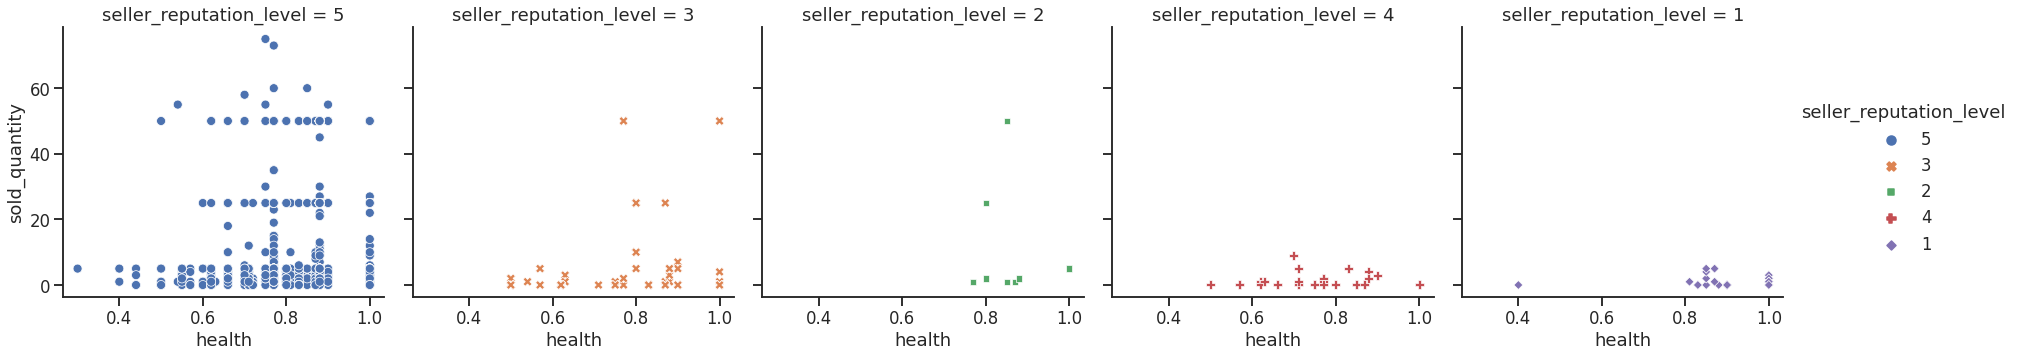

In [55]:
sns.relplot(
    data=df[~df.seller_address_state_name.isin({'Capital Federal', 'Buenos Aires'})&
           # limito la cantidad a menos de 100 para ver mas claramente la distribucion 
           # ya que es donde hay mas
           (df.sold_quantity < 100)], 
    x="health", 
    y="sold_quantity", 
    col="seller_reputation_level",
    hue="seller_reputation_level",
    style="seller_reputation_level",
    kind="scatter"
)

#### Podemos ver que la reputación 5, la mas alta, es mayoría y esta a lo largo de la distribucion de los valores, ciertamente sesgada a la derecha. Podremos interpretar que a medida que _health_ crece, tiende a haber valores mas altos de cantidad de ventas. Pero veamos un poco mas, quitando la reputación 5, para ver qué subyace en las demás mejor.
#### Llama la atención que la reputación nivel 4, que ciertamente es alta, no presenta valores altos mayores a 10. Luego tambien la categoria 1 presenta valores condensados en una alta __health__ , baja cantidad de ventas. 

#### Por último, ya entrevemos que _health_ , un atributo de ítem asignado por *Mercado Libre* , aporta información interesante. Segun el gráfico de correlacion (mas arriba) no tiene mucha linealidad con las otras variables, pero eso por un lado, no quiere decir que no sea buena predictora. 

### 6. Feature Engineering

#### Viendo la variable _domain_ , tiene muchas clases para ser una variable categórica, por lo que intentaremos por medio de un agrupamiento no supervisado a elegir, agruparlos y tener una super clase que las agrupe por similitud

In [91]:
# importo modulo para metrica de clustering
from sklearn.metrics import silhouette_score

# funcion de label encoder para moder juntar con exactitud los resultados al dataset
def label_encoder(feature):
    unique = list(set(str(f) for f in feature))
    mapper = {f: i for i, f in enumerate(unique)}
    return map(lambda x:mapper.get(x), feature)

df['domain_encoded'] = list(label_encoder(df['domain']))
df.domain_encoded.head()

0     63
1     63
2     63
3    125
4     63
Name: domain_encoded, dtype: int64

In [92]:
cols_clus = df.select_dtypes(include=['int64','float64']).columns.tolist()
#cols_clus += ['domain_encoded']

cols_clus.remove('sold_quantity')

df_clus = df[cols_clus].fillna(0)


df_clus = df_clus.groupby('domain_encoded').mean()
df_clus = round(df_clus / df_clus.max(), 4)
X_clus = df_clus.values
df_clus.head(20)


,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,seller_claims_rate,seller_cancellations_rate,seller_cancellations_value,seller_delayed_handling_value,...,installments_quantity,base_price,initial_quantity,health,price,original_price,n_attributes,item_visits,user_visits,available_quantity
domain_encoded,,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.0000,0.0000,0.3178,0.3587,0.2486,0.2465,0.0093,0.0254,0.0090,...,0.8000,0.0002,0.0218,0.8000,0.0002,0.0000,0.0657,0.0490,0.2644,0.0045
1,0.0000,0.0000,0.0000,0.0108,0.0062,0.0083,0.4836,0.0000,0.0000,0.0000,...,0.8000,0.0006,0.0008,0.6000,0.0006,0.0000,0.0986,0.0000,0.0248,0.0003
2,0.0000,0.0000,0.0000,0.1488,0.1375,0.1478,0.2947,0.1461,0.1419,0.2511,...,0.8000,0.0027,0.0021,0.8500,0.0027,0.0128,0.1123,0.0930,0.1105,0.0023
3,0.0000,0.0000,0.0000,0.0019,0.0107,0.0055,0.0000,0.6637,0.0424,0.0000,...,0.8000,0.0168,0.0004,0.7700,0.0168,0.0000,0.1424,0.0000,0.0000,0.0001
4,0.0000,0.0000,0.0919,0.0846,0.0659,0.0525,0.1954,0.1439,0.0862,0.0682,...,0.7701,0.0103,0.0122,0.8446,0.0103,0.0009,0.0970,0.0045,0.0899,0.0110
5,0.0000,0.0000,0.0000,0.0059,0.0138,0.0000,0.0000,0.0000,0.0000,0.0004,...,0.8000,0.0028,0.0024,0.8200,0.0028,0.0000,0.1096,0.0016,0.0000,0.0001
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.8000,0.0063,0.0000,0.5700,0.0063,0.0000,0.0548,0.0112,0.0001,0.0001
7,0.0000,0.0000,0.2400,0.1515,0.1504,0.1043,0.1604,0.1746,0.1220,0.0149,...,0.8000,0.0009,0.3635,0.7512,0.0009,0.0002,0.1323,0.0220,0.0814,0.3597
8,1.0000,0.3195,0.4990,0.0203,0.0193,0.0188,0.1213,0.3480,0.0234,0.0035,...,0.7559,0.0153,0.0010,0.7534,0.0153,0.0036,0.3032,0.0087,0.0263,0.0006


#### Probaremos con Kmeans y dbscan, y veremos cual arroja mejor coeficiente de mayor cohesion intra cluster y mayor distancia entre clusters.

In [33]:
# creo funciones para hacer pruebas con dos técnicas

def clusterize(X, param, kind=None):
    
    if kind == 'kmeans':
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=param, random_state=0).fit(X)
        return kmeans.labels_
    elif kind == 'hdbscan':
        import hdbscan
        clusterer = hdbscan.HDBSCAN(min_cluster_size=param).fit(X)
        return clusterer.labels_

def test_cluster_technique(*args, **kwargs):
    tipo = kwargs.get('tipo')
    upper_thr = kwargs.get('upper', 10)
    sil_metrics = {}
    for mc in range(2, upper_thr):
        labels = clusterize(args[0], mc, kwargs.get('tipo'))
        try:
            sil = silhouette_score(X_clus, labels, metric='euclidean')
            sil_metrics[sil] = mc
        except ValueError as ve:
            print(ve)
    print(f"{tipo}El paràmetro con máximo {round(max(list(sil_metrics)), 4)} coeficiente de Silhouete es: \n")
    print(sil_metrics[max(list(sil_metrics))])
    
        

    plt.plot(range(2, upper_thr), list(sil_metrics))
    plt.ylabel('Silouhete Coef')
    plt.title(tipo)
    if tipo == 'hdbscan':
        plt.xlabel('min_cluster')
    elif tipo == 'kmeans':
        plt.xlabel('N Clusters')

kmeansEl paràmetro con máximo 0.3185 coeficiente de Silhouete es: 

3


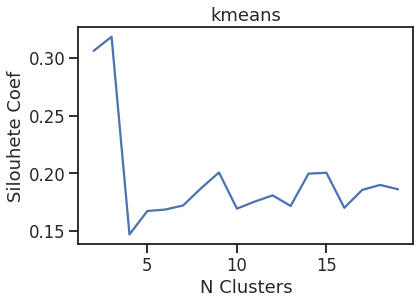

In [74]:
test_cluster_technique(df_clus.dropna(), tipo='kmeans', upper=20)

hdbscanEl paràmetro con máximo 0.2096 coeficiente de Silhouete es: 

2


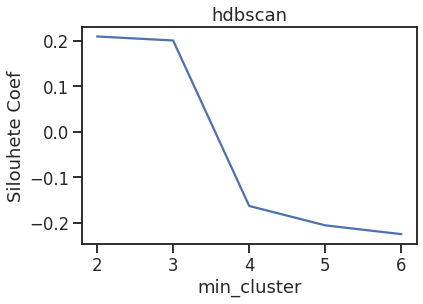

In [63]:
test_cluster_technique(X_clus, tipo='hdbscan', upper=7)

#### Usando las técnicas de agrupamiento *KMeans* y *HDBSCAN* , y validando con el coeficiente de Silouhete, vemos que la primera maximiza el coeficiente con 0.30 , agrupando de a 3. 


#### Agregamos al dataset la opcion de clusters de kmeans

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=32).fit(df_clus.fillna(0).values)
df_clus['domain_cluster'] = kmeans.labels_

df_clus = df_clus.reset_index()[['domain_cluster','domain_encoded']]
df = df.merge(df_clus, on='domain_encoded')
df.shape

(28059, 43)

#### Veamos los componentes de cada grupo

In [41]:
print(f"Los componentes del cluster 0 {df[df.domain_cluster == 0].domain.unique()}")

Los componentes del cluster 0 ['STREAMING_MEDIA_DEVICES' 'AIR_CONDITIONER_REMOTE_CONTROLS' 'MULTIMETERS'
 'CELLPHONES' 'NOTEBOOKS' 'ROUTERS_AND_WIRELESS_SYSTEMS' 'SPEAKERS'
 'HEADPHONES' 'AM_FM_RADIOS' 'MINI_COMPONENT_SYSTEMS' 'HOME_THEATERS'
 'AUDIO_AND_VIDEO_CONNECTORS' 'VACUUM_CLEANERS' 'ROBOT_VACUUMS'
 'KEYBOARD_AND_MOUSE_KITS' 'SMARTWATCHES' 'TABLETS'
 'PORTABLE_CELLPHONE_CHARGERS' 'VIDEO_GAME_CONTROLLER_CHARGERS'
 'WIRELESS_FM_TRANSMITTERS' 'LASER_POINTERS' 'VEHICLE_BATTERY_CHARGERS'
 'AUTOMOTIVE_CELLPHONE_AND_GPS_MOUNTS'
 'ELECTRIC_BRUSH_CUTTERS_AND_STRING_TRIMMERS' 'FANS' 'DRONE_PROPELLERS'
 'DRONES_FLEX_CABLES' 'DRONE_BACKPACKS_AND_CASES' 'DRONE_ANTENNAS'
 'STORAGE_WATER_HEATERS']


In [42]:
print(f"Los componentes del cluster 1 {df[df.domain_cluster == 1].domain.unique()}")

Los componentes del cluster 1 ['TELEVISION_MAIN_PLATE_REPLACEMENTS' 'SCREWS' 'UNIVERSAL_REMOTE_CONTROLS'
 'CARS_AND_VANS' 'DESIGN_AND_MULTIMEDIA_SOFTWARE' 'MICROPHONE_STANDS'
 'DJ_CASES' 'AV_RECEIVERS' 'DJ_RACKS' 'GAME_CONSOLES' 'HOME_APPLIANCES']


In [43]:
print(f"Los componentes del cluster 2 {df[df.domain_cluster == 2].domain.unique()}")

Los componentes del cluster 2 ['TELEVISIONS' 'ELECTRONIC_ACCESSORIES_AND_SPARE_PARTS'
 'TV_REMOTE_CONTROLS' 'AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS'
 'TV_AND_MONITOR_MOUNTS' 'THERMOMETERS' 'ELECTRONIC_PRODUCTS'
 'TV_RECEIVERS_AND_DECODERS' 'STREAMING_MEDIA_PLAYER_REMOTE_CONTROLS'
 'MINI_PCS' 'COMPUTER_EQUIPMENT_AND_SPARE_PARTS' 'TV_TUNERS' 'T_SHIRTS'
 'AUDIO_AND_VIDEO_CONVERTERS' 'TV_REMOTE_CONTROL_COVERS' 'TRANSISTORS'
 'TV_SERIES' 'LCD_DISPLAYS' 'MICROWAVES' 'HARD_DRIVES_AND_SSDS'
 'E_READERS' 'INSTRUMENT_AMPLIFIERS' 'AUDIO_AMPLIFIERS' 'MICROPHONES'
 'PREAMPLIFIERS' 'MICROCONTROLLER_BOARDS' 'SOUND_CONSOLES_AND_MIXERS'
 'MEGAPHONES' 'INTEGRATED_CIRCUITS' 'HEARING_AIDS' 'LED_CHIPS'
 'CELLPHONE_SIGNAL_BOOSTERS' 'KEY_RACKS' 'TV_ANTENNAS'
 'AUTOMOTIVE_AMPLIFIERS' 'LED_STRIPS' 'DATA_CABLES_AND_ADAPTERS'
 'HORN_DRIVERS' 'CELLPHONES_AND_TELEPHONY'
 'HAIR_DYES_COLORANTS_DECOLORANTS' 'CELLPHONE_ACCESSORIES'
 'SPEAKERS_STANDS' 'DJ_MIXERS' 'STUDIO_MONITORS' 'BASS_GUITARS'
 'LED_STAGE_LIGHTS' 'FACIA

#### Veamos como se comporta _sold_quantity_ en funcion de _n_attributes_ en los diferentes clusters

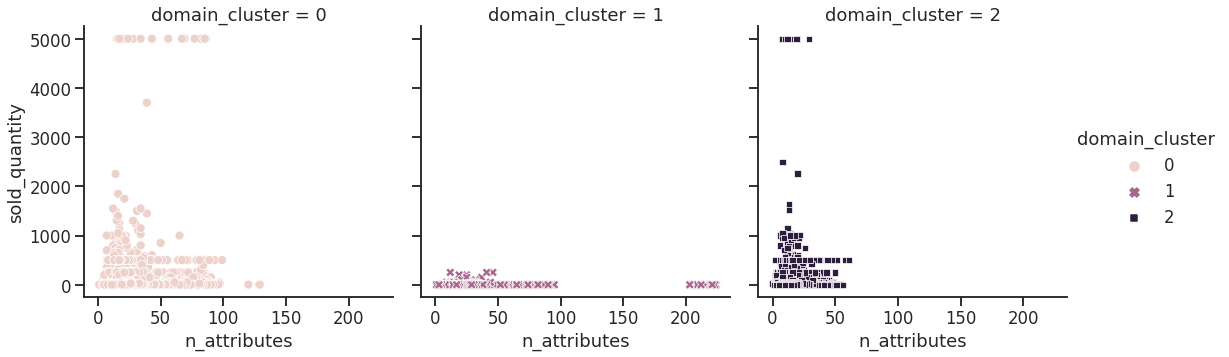

In [44]:
sns.relplot(
    data=df[(df.sold_quantity < 500)&
           df.item_visits < 600],
    x="n_attributes", 
    y="sold_quantity", 
    col="domain_cluster",
    hue="domain_cluster",
    style="domain_cluster",
    kind="scatter"
)

#### Se observa que el cluster 0 es mas disperso (aunque siempre mas concentrado sobre los valores chicos de n_attributes y sold_quantity) , mientras el cluster 1, el de menos componentes, tiene mas dispersion en cantidad de atributos, pero valores chicos en sold_quantity, y el cluster 2, tiene valores mas concentrados en valores chicos de cantidad de atributos, pero mas variabilidad en sold_quantity.
#### Dado que todos, o casi todos los ítems elegidos son electrónicos relacionados con el hogar, no resulta fácil ver un patron distintivo de cada grupo. Veremos mas adelante si aportan información para los modelos.

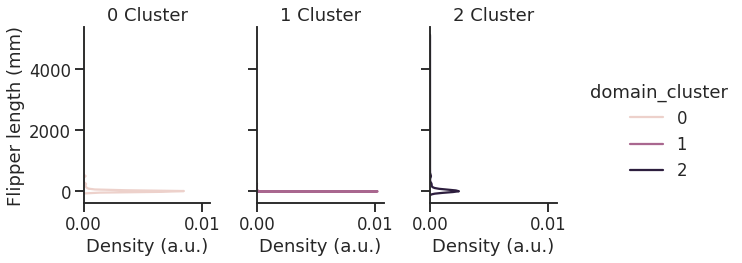

In [115]:
g = sns.displot(
    data=df, y="sold_quantity", hue="domain_cluster", col="domain_cluster",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} Cluster")

#### La sola distribucion de sold_quantity en en cluster 2 ya muestra que es de menor densidad y con cierto desvío estandar apreciable

### 7. Exploracion Temporal

#### Intentemos mirar ahora la información temporal que ofrece el dataset. ¿Cómo ha sido la secuencia de valores a lo largo del tiempo?

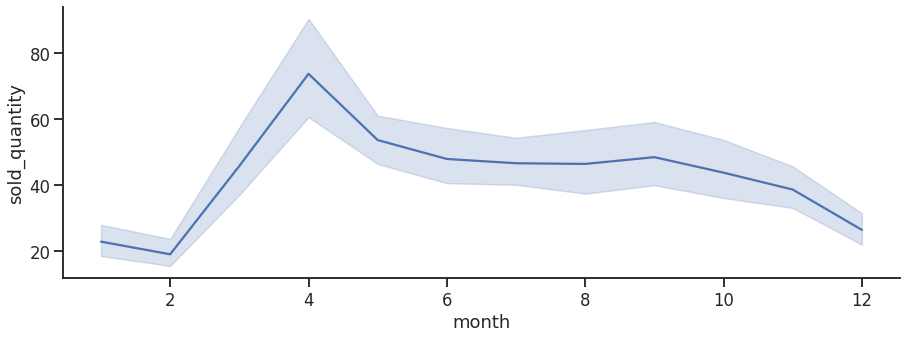

In [131]:
plt.figure(figsize=(15, 5))
(df[['stop_time', 'start_time', 'price', 'sold_quantity']]
    .dropna()
    .assign(month=lambda x: x.start_time.dt.month)
    #.query('5 < sold_quantity < 600')
    .pipe((sns.lineplot, 'data'), 'month', 'sold_quantity'))
sns.despine()

#### Siendo información sobre publicaciónes obtenida en el mes de marzo del 2021, se ve que hay publicaciones en que han comenzado hace mas de un año atras, y con un pico promedio en abril, y luego una meseta sostenida, con lento decaimiento, que se puede relacionar con el período de cuarentena, en el que por razones obvias, habrá crecido la demanda.  

#### ¿El precio habrá sido afectado por el período atípico mencionado?. Veamos su progresión:

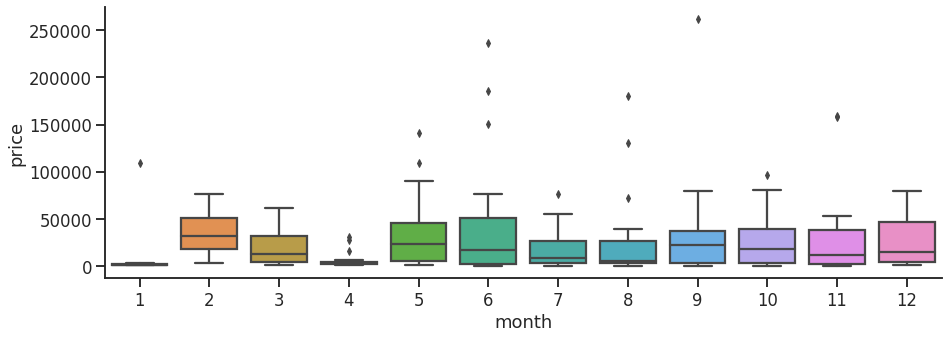

In [229]:
plt.figure(figsize=(15, 5))
(df[['stop_time', 'start_time','seller_registration_date', 'price', 'sold_quantity']]
    .dropna()
     # agrupo por mes de start_time
    .assign(month=lambda x: x.start_time.dt.month)
    .assign(year=lambda x: x.start_time.dt.year)
    .assign(seller_month=lambda x: x.seller_registration_date.dt.month)
     # limito el dataset a filas de sold_quantity entre cierto rango
    .query('5 < sold_quantity < 20')
    .query('year == 2020')
     # plot con agregación por promedio
    .pipe((sns.boxplot, 'data'), 'month', 'price'))
sns.despine()

### Se observa que hay un promedio de precio muy bajo y de una variabilidad mínima, con relación al resto de los meses del año 2020. ¿Se podría explicar porque significó que los compradores dejaron de consumir en el mes del golpe de la noticia?. De hecho el gráfico de caja muestra los valores atípicos tambien muy bajos. En mayo se ve un valor mas normal dentro de los productos que hemos seleccionado y luego sigue variando la mediana, y parece que en septiembre se recompone.

## Preprocesamiento

#### Ahora empecemos a preparar el dataset para los modelos:
* Encoding de features categoricas ordinales
* Dummies de features categoricas no-ordinales
* Transformaciones de nuevas features a partir de las fechas

### 1. Encoding

In [95]:
colse = ['seller_cancellations_rate' ,'seller_cancellations_value' ,'seller_delayed_handling_value' ,
         'seller_delayed_handling_rate' ,'buying_mode' ,'listing_type' ,'condition' ,'installments_quantity',
         'base_price' ,'initial_quantity' ,'start_time' ,'stop_time' ,'status' ,'date_created' ,'health']
df[colse].head()

,seller_cancellations_rate,seller_cancellations_value,seller_delayed_handling_value,seller_delayed_handling_rate,buying_mode,listing_type,condition,installments_quantity,base_price,initial_quantity,start_time,stop_time,status,date_created,health
0,0.0000,1.0,36.0,0.0388,buy_it_now,"['gold_special'] Categories (1, object): ['gol...",new,12.0,53100.0,15,2020-08-04 15:27:00+00:00,2040-07-30 04:00:00+00:00,True,2020-08-04 15:27:00+00:00,NaN
1,0.0000,1.0,36.0,0.0388,buy_it_now,"['gold_special'] Categories (1, object): ['gol...",new,12.0,46200.0,24,2020-10-23 18:12:47+00:00,2040-10-18 04:00:00+00:00,True,2020-10-23 18:12:47+00:00,NaN
2,0.0048,62.0,0.0,0.0000,buy_it_now,"['gold_pro'] Categories (1, object): ['gold_pro']",new,9.0,57999.0,19,2021-03-04 21:27:00+00:00,2041-02-27 04:00:00+00:00,True,2021-03-04 21:27:01+00:00,NaN
3,0.0009,59.0,0.0,0.0000,buy_it_now,"['gold_pro'] Categories (1, object): ['gold_pro']",new,18.0,45999.0,2134,2020-09-08 17:52:37+00:00,2040-09-03 12:11:36+00:00,True,2020-09-08 17:52:38+00:00,NaN
4,0.0000,0.0,0.0,0.0000,buy_it_now,"['gold_pro'] Categories (1, object): ['gold_pro']",new,18.0,69999.0,127,2020-10-19 13:17:57+00:00,2040-11-19 12:21:42+00:00,True,2020-10-19 13:17:57+00:00,1.0


#### Encoding y binarización en 0 y 1.

In [96]:
def encode_power_status(pss):
    if pss == 'platinum':
        return 1
    elif pss == 'gold':
        return 2
    elif pss == 'silver':
        return 3
    else:
        return np.nan

def encode_listing(pss):
    if pss == 'gold_premium':
        return 1
    elif pss == 'gold_pro':
        return 2
    elif pss == 'gold_special':
        return 3
    else:
        return 4
    
df['power_seller_status_enc'] = [encode_power_status(x) for x in df.power_seller_status]
df['condition'] = [1 if x=='new' else 0 for x in df.condition]
df['buying_mode_now'] = [1 if x=='buy_it_now' else 0 for x in df.buying_mode]
df['shipping_free_shipping'] = [1 if x is True else 0 for x in df.shipping_free_shipping]
df['listing_type_enc'] = [encode_listing(x[0]) if x==x else np.nan for x in df.listing_type]


In [119]:
df['accepts_mercadopago'] = [1 if x is True else 0 for x in df.accepts_mercadopago]
df['catalog_listing'] = [1 if x is True else 0 for x in df.catalog_listing]

In [122]:
# quito columnas viejas
dfp = df.drop(['buying_mode','item_id','domain', 'status','catalog_listing'], axis=1)

In [125]:
cols2dummy = ['currency_id', 'shipping_mode', 'seller_address_state_name']
for cd in cols2dummy:
    dfp[cd] = dfp[cd].astype(str)

#### Antes de transformar a dummy a todas las provincias, vamos a intentar no incrementar tanto la dimensionalidad, haciendo una agrupacion no supervisada sobre ellas

In [130]:
dfp['prov_encoded'] = list(label_encoder(dfp['seller_address_state_name']))

cols_clus_prov = dfp.select_dtypes(include=['int64','float64']).columns.tolist()

cols_clus_prov.remove('sold_quantity')

df_clus_p = dfp[cols_clus_prov].fillna(0)


df_clus_p = df_clus_p.groupby('prov_encoded').mean()
df_clus_p = round(df_clus_p / df_clus_p.max(), 4)



kmeans_p = KMeans(n_clusters=3, random_state=32).fit(df_clus_p.fillna(0).values)
df_clus_p['prov_cluster'] = kmeans_p.labels_

df_clus_p = df_clus_p.reset_index()[['prov_cluster','prov_encoded']]
dfp = dfp.merge(df_clus_p, on='prov_encoded')
dfp.shape

(28059, 41)

In [134]:
for clus in dfp.prov_cluster.unique():
    print(f"Los componentes del cluster {clus} {dfp[dfp.prov_cluster == clus].seller_address_state_name.unique()}")

Los componentes del cluster 1 ['Buenos Aires' 'Capital Federal' 'Tucumán' 'Córdoba' 'Santa Fe']
Los componentes del cluster 0 ['La Pampa' 'Mendoza' 'Misiones' 'Río Negro' 'Catamarca' 'La Rioja'
 'Entre Ríos' 'San Luis' 'Corrientes' 'Santiago del Estero' 'San Juan'
 'Chubut' 'Salta' 'Jujuy' 'Tierra del Fuego']
Los componentes del cluster 2 ['Neuquén' 'Santa Cruz' 'Formosa' 'Chaco' 'nan']


#### Vemos que a simple vista, y segun lo visto en el mapa anteriormente, tiene sentido el agrupamiento, por caudal de actividad, especialmente en el el cluster 1 , que agrupa las provincias con mas caudal de ventas. Luego se podria decir que el cluster 0 agrupa las medianas, y por útlimo el cluster 2 con las mas pequeñas en terminos de magnitud de ventas. Dejaremos el feature asi, a modo de variable ordinal.

In [136]:
dfp = dfp.drop(['seller_address_state_name', 'prov_encoded'], axis=1)

#### Quitaremos tambien currency id, por aportar poca entropia al dataset:

In [143]:
dfp.currency_id.value_counts()

['ARS']\nCategories (1, object): ['ARS']    27983
['USD']\nCategories (1, object): ['USD']       76
Name: currency_id, dtype: int64

In [144]:
dfp = dfp.drop('currency_id', axis=1)


### 2. Dummies

In [190]:
dfd = pd.get_dummies(dfp)
dfd.head()

,seller_registration_date,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,seller_claims_rate,seller_cancellations_rate,seller_cancellations_value,...,prov_cluster,seller_reputation_level_1,seller_reputation_level_2,seller_reputation_level_3,seller_reputation_level_4,seller_reputation_level_5,shipping_mode_custom,shipping_mode_me1,shipping_mode_me2,shipping_mode_not_specified
0,2016-10-04 15:46:28-04:00,0.0,0.0,0.0,12283.0,1965.0,37.0,0.0174,0.0000,1.0,...,1,0,0,0,0,1,0,0,0,1
1,2016-10-04 15:46:28-04:00,0.0,0.0,0.0,12283.0,1965.0,37.0,0.0174,0.0000,1.0,...,1,0,0,0,0,1,0,0,1,0
2,2019-03-19 08:41:57-04:00,0.0,0.0,0.0,367677.0,60652.0,422.0,0.0066,0.0009,59.0,...,1,0,0,0,0,1,0,0,1,0
3,2020-07-13 13:21:30-04:00,0.0,0.0,0.0,271928.0,88340.0,606.0,0.0065,0.0000,0.0,...,1,0,0,0,0,1,0,0,1,0
4,2020-07-13 13:21:30-04:00,0.0,0.0,0.0,271928.0,88340.0,606.0,0.0065,0.0000,0.0,...,1,0,0,0,0,1,0,0,1,0


### 4. Variables timestamp

#### Por último, procesemos un poco las fechas, para que puedan aportar mas valor.  Hay cuatro variables timestamp, pero hay una que creemos que no aportará valor, ya que es una relacionadas con los atributos del ítem. Dejaremos solamente start_time y stop_time que parecen suficientes para transformar, respecto al ítem.

In [191]:
dfd = dfd.drop(['date_created'], axis=1)

In [192]:
def diff_date(d1, d2):
    if d1 == d1 and d2 == d2:
        return round(
            (d1 - d2)/ np.timedelta64(1,'M'), 4)
    else:
        return np.nan

In [193]:
dfd['start_time_month'] = pd.DatetimeIndex(dfd.start_time).month
dfd['start_time_year'] = pd.DatetimeIndex(dfd.start_time).year
dfd['stop_time_month'] = pd.DatetimeIndex(dfd.stop_time).month
dfd['stop_time_year'] = pd.DatetimeIndex(dfd.stop_time).year
dfd['seller_registration_date_month'] = pd.DatetimeIndex(dfd.seller_registration_date).month
dfd['seller_registration_date_year'] = pd.DatetimeIndex(dfd.seller_registration_date).year
dfd['diff_stop_start_time'] = round((dfd.stop_time - dfd.start_time)/ np.timedelta64(1,'D'), 4)
dfd['seller_registration_date'] = pd.to_datetime(dfd['seller_registration_date'])

dfd = dfd.drop(['start_time','stop_time','seller_registration_date'], axis=1)


In [194]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28059 entries, 0 to 28058
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   seller_ratings_negative         27924 non-null  float64
 1   seller_ratings_neutral          27924 non-null  float64
 2   seller_ratings_positive         27924 non-null  float64
 3   seller_transactions_total       27924 non-null  float64
 4   seller_sales_completed          27923 non-null  float64
 5   seller_claims_value             27922 non-null  float64
 6   seller_claims_rate              27923 non-null  float64
 7   seller_cancellations_rate       27922 non-null  float64
 8   seller_cancellations_value      27922 non-null  float64
 9   seller_delayed_handling_value   27922 non-null  float64
 10  seller_delayed_handling_rate    27923 non-null  float64
 11  condition                       28059 non-null  int64  
 12  installments_quantity           

In [195]:
dfd.describe()

,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,seller_claims_rate,seller_cancellations_rate,seller_cancellations_value,seller_delayed_handling_value,...,shipping_mode_me1,shipping_mode_me2,shipping_mode_not_specified,start_time_month,start_time_year,stop_time_month,stop_time_year,seller_registration_date_month,seller_registration_date_year,diff_stop_start_time
count,27924.000000,27924.000000,27924.000000,27924.000000,27923.000000,27922.000000,27923.000000,27922.000000,27922.000000,27922.000000,...,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,27924.000000,27924.000000,28059.000000
mean,0.000680,0.022669,0.130784,32696.628384,5079.386133,59.852804,0.009071,0.004441,27.035993,65.850082,...,0.005310,0.777006,0.175380,6.514416,2019.551017,6.489647,2038.666096,6.357470,2012.223320,6981.318193
std,0.026076,0.148848,0.337170,69152.530189,12070.311034,136.104633,0.020125,0.025054,75.786377,265.123849,...,0.072679,0.416262,0.380299,3.775080,1.325436,3.751369,4.252301,3.245341,5.323087,1595.979104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2015.000000,1.000000,2021.000000,1.000000,1999.000000,4.073900
25%,0.000000,0.000000,0.000000,866.000000,178.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,3.000000,2019.000000,3.000000,2039.000000,4.000000,2008.000000,7299.326400
50%,0.000000,0.000000,0.000000,7769.000000,1100.000000,9.000000,0.007900,0.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,7.000000,2020.000000,7.000000,2040.000000,6.000000,2013.000000,7299.501800
75%,0.000000,0.000000,0.000000,28413.000000,3960.000000,50.000000,0.013200,0.005500,15.000000,26.000000,...,0.000000,1.000000,0.000000,10.000000,2020.000000,10.000000,2040.000000,9.000000,2017.000000,7300.000000
max,1.000000,1.000000,1.000000,455592.000000,90772.000000,942.000000,1.000000,1.000000,642.000000,3678.000000,...,1.000000,1.000000,1.000000,12.000000,2021.000000,12.000000,2041.000000,12.000000,2021.000000,9148.081000


### 5. Imputación de faltantes

#### Ahora intentaremos imputar los datos faltantes, con alguna tecnica mas sofisticada que de imputar por la media. Utilizaremos un imputador segun vecinos cercanos. La cantidad de vecinos la pondremos en cuatro.

In [196]:
from sklearn.impute import KNNImputer

In [197]:
imputer = KNNImputer(n_neighbors=4)
X_array = dfd.values

inputed_array = imputer.fit_transform(X_array)
dfimp = pd.DataFrame(X_array, columns=dfd.columns.tolist())
dfimp.head()

,seller_ratings_negative,seller_ratings_neutral,seller_ratings_positive,seller_transactions_total,seller_sales_completed,seller_claims_value,seller_claims_rate,seller_cancellations_rate,seller_cancellations_value,seller_delayed_handling_value,...,shipping_mode_me1,shipping_mode_me2,shipping_mode_not_specified,start_time_month,start_time_year,stop_time_month,stop_time_year,seller_registration_date_month,seller_registration_date_year,diff_stop_start_time
0,0.0,0.0,0.0,12283.0,1965.0,37.0,0.0174,0.0000,1.0,36.0,...,0.0,0.0,1.0,8.0,2020.0,7.0,2040.0,10.0,2016.0,7299.5229
1,0.0,0.0,0.0,12283.0,1965.0,37.0,0.0174,0.0000,1.0,36.0,...,0.0,1.0,0.0,10.0,2020.0,10.0,2040.0,10.0,2016.0,7299.4078
2,0.0,0.0,0.0,367677.0,60652.0,422.0,0.0066,0.0009,59.0,0.0,...,0.0,1.0,0.0,9.0,2020.0,9.0,2040.0,3.0,2019.0,7299.7632
3,0.0,0.0,0.0,271928.0,88340.0,606.0,0.0065,0.0000,0.0,0.0,...,0.0,1.0,0.0,10.0,2020.0,11.0,2040.0,7.0,2020.0,7335.9609
4,0.0,0.0,0.0,271928.0,88340.0,606.0,0.0065,0.0000,0.0,0.0,...,0.0,1.0,0.0,10.0,2020.0,11.0,2040.0,7.0,2020.0,7336.3573


#### Ahora llega la pregunta de los datos atípicos: ¿Los necesitamos para los modelos predictivos?¿aportan información valiosa sobre el fenomeno que queremos estudiar?
#### Creemos que ciertamente para este caso, y el tamano de este conjunto de datos, no aportan mucha información, ya que el conjunto es bastante chico. Si por el contrario podriamos entrenar con un conjunto de grandes volúmenes, la estimación que hace un model no-lineal profundo, podría aprender bien los pesos. Pero dado que es un conjunto chico, vamos a ver si hay casos en que se van demasiado de lo "normal". Ciertamente si el problema fuese detección de fraude, a priori no quitaríamos ya que podrían estar aportando información valiosa.
#### Pero al ser tambien un conjunto chico, intentaremos no podar demasiado el mismo, ya que reduciría mucho las filas. Por lo tanto utilizaremos un algormitmo no supervisado de valores atípicos basado en densidad local desde cada punto. Pero usaremos la salida que provee un valor flotante que mientras mas chico, mas atípico será, e intentaremos filtrar los extremos.

### 6. Estudio y poda de valores atípicos

In [198]:
from sklearn.neighbors import LocalOutlierFactor

In [221]:
clf_lof = LocalOutlierFactor(n_neighbors=10)
label_lof = clf_lof.fit_predict(dfimp.fillna(0).values)
dfimp['lof_negative_label'] = clf_lof.negative_outlier_factor_


#### Filtraremos 216 casos

In [222]:
dfimp[dfimp.lof_negative_label < -10].shape

(216, 49)

In [223]:
dfimp_lof = dfimp[dfimp.lof_negative_label > -10]

### Ya tenemos el dataset listo para entrenar. Luego veremos para cada modelo si hace falta hacer mas o no.

In [224]:
dfimp_lof.to_pickle('master4models_prepro.df')